# Home 3: Build a CNN for image recognition.

### Name: [Your-Name?]


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [9]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [10]:
def to_one_hot(y, num_class=10):
    one_hot = numpy.zeros((len(y), num_class))
    for i in range(len(y)):
        one_hot[i, y[i]] = 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [136]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

# train_indices = rand_indices[0:4000]
# valid_indices = rand_indices[4000:5000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [137]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, BatchNormalization, Activation, Dropout
from keras.models import Sequential

model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (5, 5), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Dropout(rate=0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_215 (Conv2D)          (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_47 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [140]:
from keras import optimizers

learning_rate = 5E-5 # to be tuned!

model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=learning_rate),
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['acc'])

In [141]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 129s 3ms/step - loss: 1.3863 - acc: 0.5087 - val_loss: 1.2391 - val_acc: 0.5610
Epoch 2/100
40000/40000 [==============================] - 123s 3ms/step - loss: 1.1521 - acc: 0.5962 - val_loss: 1.0736 - val_acc: 0.6222
Epoch 3/100
40000/40000 [==============================] - 123s 3ms/step - loss: 1.0078 - acc: 0.6492 - val_loss: 0.9947 - val_acc: 0.6520
Epoch 4/100
40000/40000 [==============================] - 123s 3ms/step - loss: 0.8972 - acc: 0.6887 - val_loss: 0.9129 - val_acc: 0.6809
Epoch 5/100
40000/40000 [==============================] - 121s 3ms/step - loss: 0.8025 - acc: 0.7249 - val_loss: 0.9161 - val_acc: 0.6793
Epoch 6/100
40000/40000 [==============================] - 122s 3ms/step - loss: 0.7278 - acc: 0.7517 - val_loss: 0.9540 - val_acc: 0.6709
Epoch 7/100
40000/40000 [==============================] - 122s 3ms/step - loss: 0.6513 - acc: 0.7774 - val_loss: 0.

40000/40000 [==============================] - 121s 3ms/step - loss: 0.0517 - acc: 0.9830 - val_loss: 0.9872 - val_acc: 0.7631
Epoch 60/100
40000/40000 [==============================] - 121s 3ms/step - loss: 0.0504 - acc: 0.9831 - val_loss: 1.0688 - val_acc: 0.7473
Epoch 61/100
40000/40000 [==============================] - 121s 3ms/step - loss: 0.0486 - acc: 0.9837 - val_loss: 1.0471 - val_acc: 0.7532
Epoch 62/100
40000/40000 [==============================] - 121s 3ms/step - loss: 0.0450 - acc: 0.9859 - val_loss: 1.0086 - val_acc: 0.7550
Epoch 63/100
40000/40000 [==============================] - 121s 3ms/step - loss: 0.0473 - acc: 0.9842 - val_loss: 1.0920 - val_acc: 0.7435
Epoch 64/100
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0457 - acc: 0.9856 - val_loss: 1.1644 - val_acc: 0.7433
Epoch 65/100
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0508 - acc: 0.9830 - val_loss: 1.0362 - val_acc: 0.7550
Epoch 66/100
40000/40000 [=======

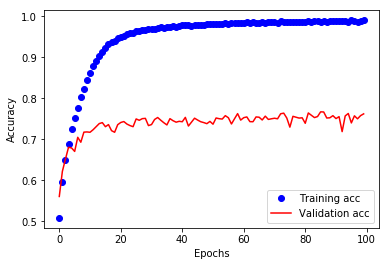

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [ ]:
<Compile your model again (using the same hyper-parameters)>
...

In [ ]:
<Train your model on the entire training set (50K samples)>
<Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
<Do NOT use the validation_data option (because now you do not have validation data)>
...

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [ ]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))